In [ ]:
!pip install deepface

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
from deepface import DeepFace
import cv2
import glob
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


In [ ]:
for root, dirs, files in os.walk("/content/drive/MyDrive/actors"):
    dirs.sort()

print(dirs)

['Adel_FerdowsiPour', 'Ali_Daei', 'Ali_Khamenei', 'Asghar_Farhadi', 'Bahare_Rahnama', 'Bahram_Radan', 'Behnam_Bani', 'Dariush_Arjmand', 'Ebi', 'Ehsan_Alikhani', 'Elham_Hamidi', 'Elnaz_Shakerdoost', 'Golshifteh_Farahani', 'Hamid_Lolaei', 'Hootan_Shakiba', 'Javad_Khiabani', 'Javad_Razavian', 'Leyla_Hatami', 'Mahnaz_Afshar', 'Mehran_Ghafourian', 'Mehran_Modiri', 'Mohsen_Chavoshi', 'Parinaz_Izadyar', 'Parsa_Pirozfar', 'Parviz_Parastooee', 'Shahab_Hosseini', 'Siamak_Ansari', 'Siavash_Ghomayshi', 'Tannaz_Tabatabaee', 'Taraneh_Alidoosti']


In [ ]:
for dir in dirs:
  print(dir)

Adel_FerdowsiPour
Ali_Daei
Ali_Khamenei
Asghar_Farhadi
Bahare_Rahnama
Bahram_Radan
Behnam_Bani
Dariush_Arjmand
Ebi
Ehsan_Alikhani
Elham_Hamidi
Elnaz_Shakerdoost
Golshifteh_Farahani
Hamid_Lolaei
Hootan_Shakiba
Javad_Khiabani
Javad_Razavian
Leyla_Hatami
Mahnaz_Afshar
Mehran_Ghafourian
Mehran_Modiri
Mohsen_Chavoshi
Parinaz_Izadyar
Parsa_Pirozfar
Parviz_Parastooee
Shahab_Hosseini
Siamak_Ansari
Siavash_Ghomayshi
Tannaz_Tabatabaee
Taraneh_Alidoosti


In [ ]:
def generate_data(img_path,dir,i):
  embedding_objs = DeepFace.represent(img_path = img_path,enforce_detection=False,model_name='ArcFace')
  embedding = embedding_objs[0]["embedding"]
  embedding.append(dir)
  embedding.append(i)
  print(embedding)
  return np.array(embedding, dtype=object)

In [ ]:
columns = []
for i in range(512):
  columns.append('features'+str(i))

columns.append('label')
columns.append('label_number')
print(columns)


['features0', 'features1', 'features2', 'features3', 'features4', 'features5', 'features6', 'features7', 'features8', 'features9', 'features10', 'features11', 'features12', 'features13', 'features14', 'features15', 'features16', 'features17', 'features18', 'features19', 'features20', 'features21', 'features22', 'features23', 'features24', 'features25', 'features26', 'features27', 'features28', 'features29', 'features30', 'features31', 'features32', 'features33', 'features34', 'features35', 'features36', 'features37', 'features38', 'features39', 'features40', 'features41', 'features42', 'features43', 'features44', 'features45', 'features46', 'features47', 'features48', 'features49', 'features50', 'features51', 'features52', 'features53', 'features54', 'features55', 'features56', 'features57', 'features58', 'features59', 'features60', 'features61', 'features62', 'features63', 'features64', 'features65', 'features66', 'features67', 'features68', 'features69', 'features70', 'features71', '

In [ ]:
Data = []
i = -1
for dir in dirs:
  img_dir = "/content/drive/MyDrive/actors/"+ dir
  data_path = os.path.join(img_dir,'*g')
  files = glob.glob(data_path)
  i = i + 1
  for img in files:
    data = generate_data(img,dir,i)
    Data.append(data)
  print(Data)





In [ ]:
dataframe = pd.DataFrame(Data,columns=columns)
dataframe.to_csv('Dataset.csv',index=False)

In [3]:
#/content/
data = pd.read_csv('Dataset.csv')
data

,features0,features1,features2,features3,features4,features5,features6,features7,features8,features9,...,features504,features505,features506,features507,features508,features509,features510,features511,label,label_number
0,-0.093122,0.136989,-0.086642,-0.426304,-0.042706,-0.081409,0.092538,0.031205,-0.174202,-0.033089,...,0.102491,0.005758,0.217871,-0.111188,0.183260,-0.083088,-0.003816,-0.088071,Adel_FerdowsiPour,0
1,-0.009296,0.095311,-0.013561,-0.140956,-0.040919,-0.160980,0.143438,0.061793,-0.136330,-0.052986,...,0.221995,0.030235,0.003967,-0.164073,0.212951,-0.129511,0.073259,0.078955,Adel_FerdowsiPour,0
2,-0.015224,-0.006735,-0.011721,-0.206844,-0.029354,-0.023836,-0.019762,-0.034777,0.075051,-0.112135,...,0.139996,-0.035084,-0.001108,-0.007636,0.121330,-0.033755,0.330664,0.231239,Adel_FerdowsiPour,0
3,-0.081743,0.205214,-0.030393,-0.156597,0.045059,-0.018158,0.142055,0.012558,-0.046500,-0.051952,...,0.298377,-0.089831,0.026282,-0.044058,0.220639,-0.167518,0.055408,0.194642,Adel_FerdowsiPour,0
4,0.077873,0.140193,0.036899,0.032684,-0.094423,-0.119991,-0.046553,0.133044,-0.087808,-0.088813,...,0.201483,0.092777,0.124161,-0.162682,0.052279,-0.295995,0.157454,0.283681,Adel_FerdowsiPour,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,-0.382196,0.836606,-0.253352,-0.519520,-0.093697,0.490086,-0.188238,-0.111835,0.038906,-0.033555,...,0.529527,-0.925655,0.351931,-0.278704,-0.056961,0.053183,-0.496061,-1.419080,Taraneh_Alidoosti,29
1723,0.153010,0.295141,0.056225,-0.039806,-0.074120,-0.088459,-0.216450,-0.084852,-0.040066,-0.127433,...,-0.187565,-0.100080,0.117857,-0.064893,-0.143238,0.473840,0.239068,0.031931,Taraneh_Alidoosti,29
1724,-0.043083,-0.016352,0.079556,-0.508735,-0.256516,0.119429,-0.157972,0.179302,-0.220142,-0.221467,...,-0.114331,-0.129674,0.351108,0.072199,-0.064502,0.279231,0.203568,-0.047292,Taraneh_Alidoosti,29
1725,0.154810,0.147008,0.107926,0.010837,0.082153,0.005969,-0.111574,-0.205261,-0.047268,-0.237677,...,-0.339670,-0.225460,0.256562,-0.089763,-0.311277,0.203809,-0.068465,-0.070118,Taraneh_Alidoosti,29


In [4]:
X = np.array(data.iloc[:, 0:512].values)
Y = np.array(data['label_number'])

Y = Y.reshape(-1,1)

In [5]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25 ,shuffle=True)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1295, 512)
(1295, 1)
(432, 512)
(432, 1)


In [6]:
model = tf.keras.models.Sequential([
    Dense(1024,input_dim=512,activation=None),
    Dense(512,activation='elu'),
    Dense(256,activation='elu'),
    Dense(128,activation='elu'),
    Dense(64,activation='elu'),
    Dense(30,activation="softmax")
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
              loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [7]:
history = model.fit(X_train,Y_train,epochs=80)


Epoch 1/80
41/41 [==============================] - 1s 10ms/step - loss: 3.3218 - accuracy: 0.0880
Epoch 2/80
41/41 [==============================] - 0s 12ms/step - loss: 3.1245 - accuracy: 0.2834
Epoch 3/80
41/41 [==============================] - 0s 12ms/step - loss: 2.9584 - accuracy: 0.4672
Epoch 4/80
41/41 [==============================] - 1s 12ms/step - loss: 2.8065 - accuracy: 0.5699
Epoch 5/80
41/41 [==============================] - 0s 10ms/step - loss: 2.6665 - accuracy: 0.6193
Epoch 6/80
41/41 [==============================] - 0s 10ms/step - loss: 2.5339 - accuracy: 0.6548
Epoch 7/80
41/41 [==============================] - 0s 10ms/step - loss: 2.4103 - accuracy: 0.6610
Epoch 8/80
41/41 [==============================] - 0s 12ms/step - loss: 2.2945 - accuracy: 0.6903
Epoch 9/80
41/41 [==============================] - 0s 9ms/step - loss: 2.1861 - accuracy: 0.6842
Epoch 10/80
41/41 [==============================] - 0s 11ms/step - loss: 2.0820 - accuracy: 0.7104
Epoch 11/8

In [8]:
model.evaluate(X_test,Y_test)

14/14 [==============================] - 0s 4ms/step - loss: 0.6646 - accuracy: 0.8333


[0.6646202802658081, 0.8333333134651184]

In [9]:
model.save('Weight/model.h5')

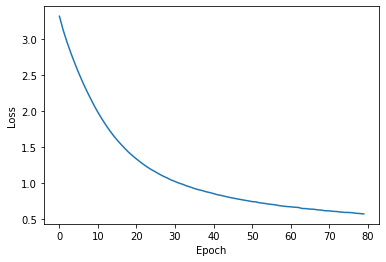

In [10]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

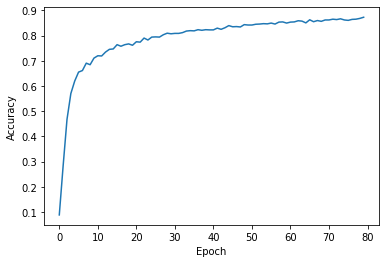

In [11]:
plt.plot(history.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()